<a href="https://colab.research.google.com/github/ufukhurriyetoglu/vector-normalization-for-vector-search/blob/main/vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --user annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=551926 sha256=0c1163b853f94b56b50d287afa2a3128150898bf84756a0a700713b4f844281c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [244]:
!pip install memory_profiler

In [245]:
%load_ext memory_profiler

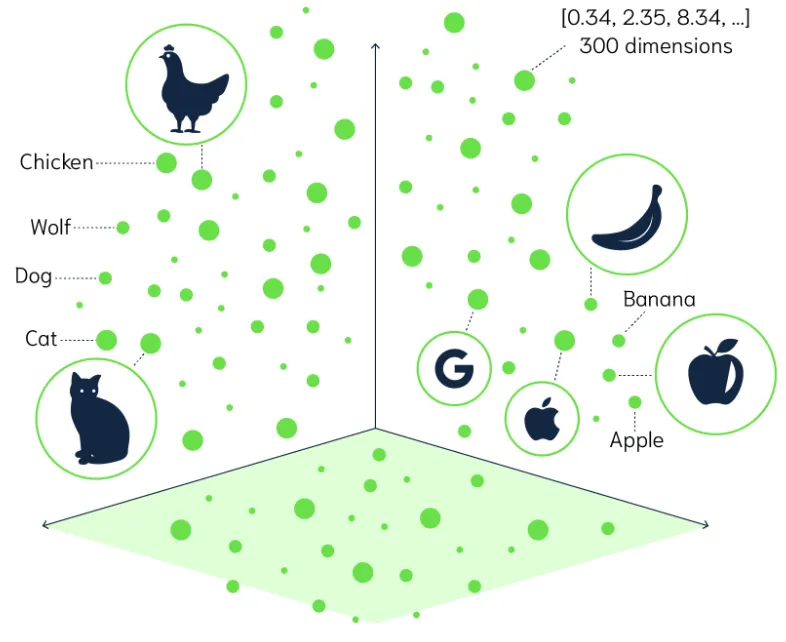

In [1]:
from annoy import AnnoyIndex
import random

f = 40  # Length of item vector that will be indexed

t = AnnoyIndex(f, 'angular')
for i in range(1000):
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

u = AnnoyIndex(f, 'angular')
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 15)) # will find the 1000 nearest neighbors

[0, 431, 839, 384, 926, 516, 755, 319, 417, 804, 711, 799, 884, 196, 214]


In [2]:
t.get_item_vector(0)

[-0.6161921620368958,
 -1.0115079879760742,
 0.48095598816871643,
 -1.7995319366455078,
 1.2838042974472046,
 0.356207013130188,
 -1.0575439929962158,
 0.037650760263204575,
 0.15179407596588135,
 0.3258351981639862,
 1.4119811058044434,
 2.493325710296631,
 -0.9974278807640076,
 -1.3786014318466187,
 -1.3270998001098633,
 0.27189403772354126,
 0.2274068295955658,
 -0.49559324979782104,
 -1.8852918148040771,
 0.7550532221794128,
 0.16483916342258453,
 0.07498405128717422,
 1.5175787210464478,
 -0.7996917963027954,
 -0.27289116382598877,
 1.8032491207122803,
 0.5883339643478394,
 -1.014535903930664,
 1.8062924146652222,
 0.16259892284870148,
 0.23588846623897552,
 -0.554306149482727,
 0.7441499829292297,
 -0.5683028101921082,
 -0.3825274705886841,
 0.3524007201194763,
 2.3919758796691895,
 0.46895840764045715,
 -0.8596274852752686,
 -0.29565244913101196]

In [3]:
t.get_item_vector(777)

[-0.4268738627433777,
 0.7969052195549011,
 1.686496376991272,
 0.2505817413330078,
 1.3958673477172852,
 0.7225936651229858,
 0.24732136726379395,
 1.2137845754623413,
 0.1384531706571579,
 -0.9859532713890076,
 -0.5160443782806396,
 -0.4180992841720581,
 -0.01778680644929409,
 -1.1540290117263794,
 0.47776105999946594,
 1.729653239250183,
 0.12837612628936768,
 -0.9235739707946777,
 -1.542372465133667,
 0.7778258919715881,
 -0.8706264495849609,
 0.34045132994651794,
 1.3094978332519531,
 2.1923699378967285,
 -0.6665194034576416,
 -0.6070900559425354,
 0.17518557608127594,
 -0.7468043565750122,
 0.05761384218931198,
 1.5180295705795288,
 -1.5840309858322144,
 2.0481348037719727,
 0.8882721066474915,
 0.8566828966140747,
 0.07580234855413437,
 -0.13478532433509827,
 -1.7632579803466797,
 0.44519615173339844,
 0.1650576889514923,
 -0.5987249612808228]

Does not provide much intuition, lets consider a smaller subset of vectors

In [196]:
vectors = [
    [0.3, 0.4],
    [3.1, 4.2],
    [4.0, 3.0],
    [4.0, 5.0],
    [8.0, 10.0],
    [6.1, 8.1],
    [15.2, 20.3],
    [18.2, 24.3],
    [36.5, 48.3]
]

In [197]:
# lets create the annoy index for vectors collection

In [198]:
length_of_vector = 2

In [199]:
t_angular = AnnoyIndex(length_of_vector, 'angular')
t_euclidean = AnnoyIndex(length_of_vector, 'euclidean')

In [200]:
for i, vector in enumerate(vectors):
  t_angular.add_item(i, vector)
  t_euclidean.add_item(i, vector)

In [201]:
t_angular.build(3) # 10 trees
t_angular.save('test_angular.ann')

u_angular = AnnoyIndex(length_of_vector, 'angular')
u_angular.load('test_angular.ann')

True

In [202]:
t_euclidean.build(3) # 10 trees
t_euclidean.save('test_euclidean.ann')

u_euclidean = AnnoyIndex(length_of_vector, 'euclidean')
u_euclidean.load('test_euclidean.ann')

True

In [203]:
counter = 0
print("For the vector [0.3, 0.4]")
for item_index in u_angular.get_nns_by_item(0, 5):
  print(f"{counter}th  neighbor: ")
  print(vectors[item_index])
  counter+=1
  print()

For the vector [0.3, 0.4]
0th  neighbor: 
[0.3, 0.4]

1th  neighbor: 
[18.2, 24.3]

2th  neighbor: 
[15.2, 20.3]

3th  neighbor: 
[6.1, 8.1]

4th  neighbor: 
[36.5, 48.3]



In [204]:
counter = 0
print("For the vector [0.3, 0.4]")
for item_index in u_euclidean.get_nns_by_item(0, 5):
  print(f"{counter}th  neighbor: ")
  print(vectors[item_index])
  counter+=1
  print()

For the vector [0.3, 0.4]
0th  neighbor: 
[0.3, 0.4]

1th  neighbor: 
[4.0, 3.0]

2th  neighbor: 
[3.1, 4.2]

3th  neighbor: 
[4.0, 5.0]

4th  neighbor: 
[6.1, 8.1]



In [205]:
## Lets see what happens after normalization

# we will use L2-normalization first

In [206]:
import numpy as np

To normalize a vector, you can divide each element of the vector by its magnitude. This will result in a vector with a length or magnitude of 1, also known as a unit vector. Normalizing a vector preserves its original direction while adjusting its magnitude.

Here's an example of how to normalize a vector using NumPy:

In [207]:


# Create a vector
vector = np.array([3, 4])


In [208]:
# Calculate the magnitude of the vector
magnitude = np.linalg.norm(vector)

In [209]:
magnitude

5.0

In [210]:
# Normalize the vector
normalized_vector = vector / magnitude

print("Normalized Vector:", normalized_vector)

Normalized Vector: [0.6 0.8]


In [211]:
# lets create python functions to be able to observe better

In [212]:
def calculate_magnitude(vector):
  return np.linalg.norm(vector)

In [213]:
calculate_magnitude([0.3, 0.4])

0.5

In [214]:
calculate_magnitude([18, 24])

30.0

In [215]:
def normalize_vector(vector):
  return vector / calculate_magnitude(vector)

In [216]:
normalize_vector([0.3, 0.4])

array([0.6, 0.8])

In [217]:
normalize_vector([18, 24])

array([0.6, 0.8])

In [218]:
## !yay normalized forms are equal for [0.3, 0.4] and [18, 24], because both construct 3-4-5 triangle in terms of vector space

In [219]:
# lets normalize the vectors collection

In [220]:
normalized_vectors = [normalize_vector(vector) for vector in vectors]

In [221]:
normalized_vectors

[array([0.6, 0.8]),
 array([0.5938523 , 0.80457408]),
 array([0.8, 0.6]),
 array([0.62469505, 0.78086881]),
 array([0.62469505, 0.78086881]),
 array([0.60157674, 0.79881501]),
 array([0.5993689 , 0.80047294]),
 array([0.59947286, 0.80039508]),
 array([0.60290319, 0.79781436])]

In [248]:
# lets write a modular annoy index builder

def create_annoy_index(distance_metric, vector_length, vectors, vector_type="original"):
  %time
  index_name = "_".join(["index", distance_metric, str(vector_length), vector_type])
  print(f"\n index name: {index_name}\n")
  annoy_index = AnnoyIndex(vector_length, distance_metric)
  for i, vector in enumerate(vectors):
    annoy_index.add_item(i, vector)
  annoy_index.build(3)
  annoy_index.save(index_name)
  reloaded_annoy_index = AnnoyIndex(vector_length, distance_metric)
  %memit
  reloaded_annoy_index.load(index_name)
  return reloaded_annoy_index

In [249]:
normalized_vectors_angular_distance_annoy_index = create_annoy_index("angular", 2, normalized_vectors, "normalized")
original_vectors_angular_distance_annoy_index = create_annoy_index("angular", 2, vectors)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs

 index name: index_angular_2_normalized

peak memory: 330.44 MiB, increment: 0.00 MiB
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs

 index name: index_angular_2_original

peak memory: 330.56 MiB, increment: 0.12 MiB


In [251]:
normalized_vectors_dot_distance_annoy_index = create_annoy_index("dot", 2, normalized_vectors, "normalized")
original_vectors_dot_distance_annoy_index = create_annoy_index("dot", 2, vectors)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

 index name: index_dot_2_normalized

peak memory: 330.64 MiB, increment: 0.00 MiB
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs

 index name: index_dot_2_original

peak memory: 330.64 MiB, increment: 0.00 MiB


In [252]:
normalized_vectors_euclidean_distance_annoy_index = create_annoy_index("euclidean", 2, normalized_vectors, "normalized")
original_vectors_euclidean_distance_annoy_index = create_annoy_index("euclidean", 2, vectors)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs

 index name: index_euclidean_2_normalized

peak memory: 330.67 MiB, increment: 0.00 MiB
CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 4.77 µs

 index name: index_euclidean_2_original

peak memory: 330.67 MiB, increment: -0.00 MiB


In [253]:
%time
original_vectors_angular_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


[0, 7, 6, 5, 8]

In [254]:
%time
normalized_vectors_angular_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


[0, 7, 6, 5, 8]

In [255]:
%time
normalized_vectors_euclidean_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


[0, 7, 6, 5, 8]

In [256]:
%time
original_vectors_euclidean_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


[0, 2, 1, 3, 5]

In [257]:
%time
original_vectors_dot_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


[8, 7, 6, 4, 5]

In [258]:
%time
normalized_vectors_dot_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


[0, 7, 6, 5, 8]

In [259]:
## we can observe a response time drop when we use AnnoyIndex with normalized vectors

In [260]:
## another observation is the result of the vector search, after we normalize the vectors despite the distance metric the results are same

In [261]:
## best response time is returned by dot distance metric, because it's a matrix dot product, and because of the normalization we apply it is the same to angular metric which is cosine
## distance metric

In [262]:
# lets check the indexing time and query time with larger vectors collection size
# we will use our first example from Annoy documentation to create a large array of vectors

In [263]:
# helper function to create vectors with fixed size


In [264]:
vectors = []
vector_size = 6
for i in range(100000):
    v = [random.randint(0, 100) for z in range(vector_size)]
    vectors.append(v)

In [265]:
len(vectors)

100000

In [266]:
normalized_vectors = [normalize_vector(v) for v in vectors]

In [267]:
normalized_vectors_angular_distance_annoy_index = create_annoy_index("angular", vector_size, normalized_vectors, "normalized")
original_vectors_angular_distance_annoy_index = create_annoy_index("angular", vector_size, vectors)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs

 index name: index_angular_6_normalized

peak memory: 332.69 MiB, increment: 0.04 MiB
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs

 index name: index_angular_6_original

peak memory: 332.73 MiB, increment: 0.00 MiB


In [268]:
normalized_vectors_dot_distance_annoy_index = create_annoy_index("dot", vector_size, normalized_vectors, "normalized")
original_vectors_dot_distance_annoy_index = create_annoy_index("dot", vector_size, vectors)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs

 index name: index_dot_6_normalized

peak memory: 333.18 MiB, increment: 0.00 MiB
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs

 index name: index_dot_6_original

peak memory: 334.07 MiB, increment: 0.00 MiB


In [269]:
normalized_vectors_euclidean_distance_annoy_index = create_annoy_index("euclidean", vector_size, normalized_vectors, "normalized")
original_vectors_euclidean_distance_annoy_index = create_annoy_index("euclidean", vector_size, vectors)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs

 index name: index_euclidean_6_normalized

peak memory: 334.09 MiB, increment: 0.00 MiB
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs

 index name: index_euclidean_6_original

peak memory: 334.13 MiB, increment: 0.00 MiB


In [271]:
%time
original_vectors_dot_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


[50510, 96346, 1711, 81686, 54486]

In [272]:
%time
normalized_vectors_dot_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


[0, 84026, 2459, 6629, 7383]

In [274]:
%time
%memit
normalized_vectors_angular_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.29 µs
peak memory: 338.34 MiB, increment: 0.00 MiB


[0, 84026, 89072, 64568, 2459]

In [275]:
%time
%memit
original_vectors_angular_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs
peak memory: 338.39 MiB, increment: 0.00 MiB


[0, 84026, 87559, 89072, 64568]

In [278]:
%time
normalized_vectors_euclidean_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


[0, 2100, 89072, 43400, 64568]

In [279]:
%time
original_vectors_euclidean_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


[0, 6629, 56575, 63048, 81]

In [280]:
%time
original_vectors_angular_distance_annoy_index.get_nns_by_item(0, 5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.68 µs


[0, 84026, 87559, 89072, 64568]

In [281]:
def print_nearest_neighbors(annoy_index_to_search, search_item, neighbor_count, normalization_flag=False):
  counter = 0
  print("For the vector ", annoy_index_to_search.get_item_vector(search_item))
  for item_index in annoy_index_to_search.get_nns_by_item(0, 5):
    print(f"{counter}th  neighbor: ")
    if not normalization_flag:
      print(vectors[item_index])
    else:
      print(normalized_vectors[item_index])
    counter+=1
    print()

In [282]:
print_nearest_neighbors(original_vectors_euclidean_distance_annoy_index, 0, 5)

For the vector  [87.0, 36.0, 75.0, 100.0, 52.0, 6.0]
0th  neighbor: 
[87, 36, 75, 100, 52, 6]

1th  neighbor: 
[86, 44, 80, 95, 53, 16]

2th  neighbor: 
[89, 34, 75, 94, 38, 9]

3th  neighbor: 
[97, 39, 74, 95, 41, 4]

4th  neighbor: 
[85, 32, 76, 96, 35, 6]



In [283]:
print_nearest_neighbors(normalized_vectors_euclidean_distance_annoy_index, 0, 5, True)

For the vector  [0.5272243022918701, 0.21816179156303406, 0.45450371503829956, 0.6060049533843994, 0.3151225745677948, 0.03636029735207558]
0th  neighbor: 
[0.52722432 0.21816179 0.45450372 0.60600496 0.31512258 0.0363603 ]

1th  neighbor: 
[0.52194613 0.24026091 0.43909753 0.57994014 0.37281866 0.0414243 ]

2th  neighbor: 
[0.48969011 0.16552905 0.47589602 0.63452803 0.31726401 0.05517635]

3th  neighbor: 
[0.57521982 0.17928929 0.44075285 0.58269021 0.32122665 0.        ]

4th  neighbor: 
[0.52718331 0.212447   0.39342038 0.6294726  0.35407834 0.02360522]



In [284]:
original_vectors_euclidean_distance_annoy_index.get_item_vector(0)

[87.0, 36.0, 75.0, 100.0, 52.0, 6.0]